# **Import**

In [1]:
import networkx as nx
import numpy as np
import itertools
import random
import math
import matplotlib.pyplot as plt

# **Example**

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

city_coords = np.load('TravellingSalesMan.npy')

# Compute Euclidean distance matrix
distance_matrix = np.sqrt(((city_coords[:, np.newaxis, :] - city_coords[np.newaxis, :, :]) ** 2).sum(axis=2))

# **Functions**

In [3]:
# Generate an initial tour using the Nearest Neighbor heuristic
def nearest_neighbor_tour(distance_matrix):
    n = distance_matrix.shape[0]
    unvisited = set(range(n))
    tour = [0]  # Start from city 0
    unvisited.remove(0)

    while unvisited:
        last = tour[-1]
        next_city = min(unvisited, key=lambda city: distance_matrix[last, city])
        tour.append(next_city)
        unvisited.remove(next_city)

    return tour + [tour[0]]  # Return to the starting city

# Calculate the total distance of a tour
def tour_length(tour, distance_matrix):
    return sum(distance_matrix[tour[i], tour[i + 1]] for i in range(len(tour) - 1))

# Perform a 2-opt swap
def two_opt_swap(tour, i, k):
    return tour[:i] + tour[i:k+1][::-1] + tour[k+1:]

# 3-opt swap
def three_opt_swap(tour, i, j, k):
    """
    Generate all 7 possible 3-Opt reconnections while preserving the start/end at city 0.
    The input `tour` is assumed to start and end at 0 (e.g., [0, 1, 2, 3, 0]).
    Indices i, j, k are chosen such that 0 < i < j < k < len(tour)-1.
    """
    # Split the tour into segments (A, B, C, D)
    # Ensure 0 < i < j < k < len(tour)-1 to avoid breaking the start/end 0
    A = tour[:i+1]          # From start (0) to i (inclusive)
    B = tour[i+1:j+1]       # From i+1 to j (inclusive)
    C = tour[j+1:k+1]       # From j+1 to k (inclusive)
    D = tour[k+1:]          # From k+1 to end (includes the final 0)

    # Generate all 7 possible reconfigurations
    candidates = [
        A + B + C + D,             # Original tour
        A + B[::-1] + C + D,       # Reverse B
        A + B + C[::-1] + D,       # Reverse C
        A + C + B + D,             # Swap B and C
        A + C[::-1] + B[::-1] + D, # Reverse B and C, then swap
        A + C + B[::-1] + D,       # Reverse B and swap with C
        A + C[::-1] + B + D,       # Reverse C and swap with B
    ]

    return candidates

# Plot the large TSP tour
def plot_tour(tour, city_coords):
    plt.figure(figsize=(10, 10))

    # Plot cities
    plt.scatter(city_coords[:, 0], city_coords[:, 1], c='red', marker='o')

    # Plot connections
    for i in range(len(tour) - 1):
        plt.plot([city_coords[tour[i], 0], city_coords[tour[i + 1], 0]],
                 [city_coords[tour[i], 1], city_coords[tour[i + 1], 1]], 'b-', alpha=0.6)

    plt.title("Optimized 3-Opt TSP Tour (50 Cities)")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

# **2-Opt**

In [ ]:
def TwoOpt(distance_matrix):
    tour = nearest_neighbor_tour(distance_matrix)  # Ensure tour starts/ends at 0
    best_distance = tour_length(tour, distance_matrix)
    improved = True
    n = len(tour)

    while improved:
        improved = False
        for i in range(1, n - 1):  # i can go up to n-2 (avoid last 0)
            for k in range(i + 1, n - 1):  # k goes up to n-2
                new_tour = two_opt_swap(tour, i, k)
                new_distance = tour_length(new_tour, distance_matrix)
                if new_distance < best_distance:
                    tour = new_tour
                    best_distance = new_distance
                    improved = True
                    break  # Restart search after improvement
            if improved:
                break
    return tour, best_distance

initial_tour = nearest_neighbor_tour(distance_matrix)
print("Initial Tour:", initial_tour, "Distance:", tour_length(initial_tour, distance_matrix))
# Run Lin-Kernighan and display results
optimized_tour, optimized_distance = TwoOpt(distance_matrix)
print("Optimized Tour:", optimized_tour)
print("Optimized Distance:", optimized_distance)

Initial Tour: [0, 179, 43, 34, 140, 132, 157, 83, 73, 174, 122, 150, 67, 19, 85, 14, 7, 167, 193, 185, 171, 8, 2, 101, 60, 6, 177, 104, 81, 106, 117, 136, 180, 48, 126, 98, 124, 57, 194, 198, 74, 58, 100, 37, 113, 49, 36, 92, 47, 79, 166, 161, 84, 146, 41, 143, 29, 18, 72, 115, 5, 68, 56, 11, 38, 156, 25, 187, 160, 149, 175, 134, 147, 181, 31, 45, 135, 163, 33, 191, 23, 148, 176, 162, 70, 169, 63, 186, 54, 82, 103, 75, 27, 107, 12, 3, 62, 21, 69, 141, 129, 55, 87, 159, 94, 142, 182, 61, 133, 4, 139, 59, 109, 17, 196, 172, 16, 112, 123, 28, 128, 42, 155, 151, 96, 77, 189, 105, 76, 121, 93, 32, 120, 66, 80, 154, 88, 178, 91, 1, 188, 89, 90, 71, 197, 10, 65, 97, 39, 50, 40, 158, 127, 22, 114, 95, 184, 35, 119, 118, 26, 138, 170, 165, 15, 30, 152, 108, 24, 51, 44, 153, 111, 168, 78, 64, 144, 52, 183, 13, 53, 192, 9, 173, 199, 110, 102, 190, 137, 86, 195, 99, 46, 130, 125, 145, 20, 131, 164, 116, 0] Distance: 1402.0198203752232
Optimized Tour: [0, 179, 148, 23, 191, 33, 46, 130, 138, 170, 3

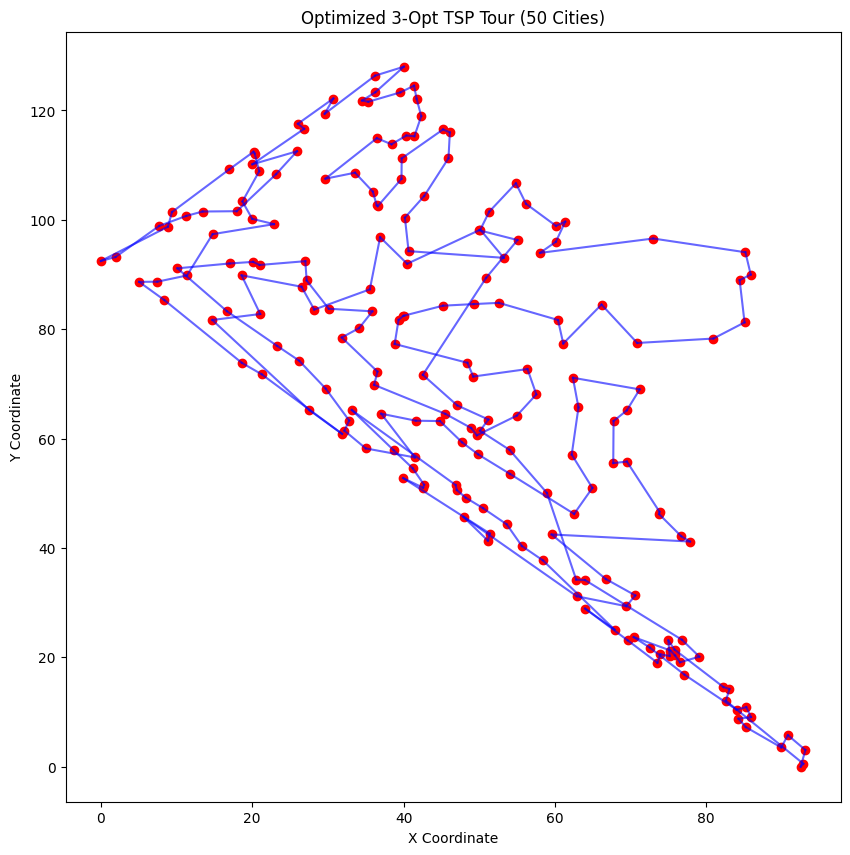

In [ ]:
plot_tour(optimized_tour, distance_matrix)

#**3-Opt**

In [ ]:
def three_opt(distance_matrix):
    """
    Improve the tour using 3-Opt, ensuring the tour starts and ends at city 0.
    """
    best_tour = nearest_neighbor_tour(distance_matrix)
    best_distance = tour_length(best_tour, distance_matrix)
    improved = True
    n = len(best_tour)

    while improved:
        improved = False
        # Iterate over all valid (i, j, k) where 0 < i < j < k < n-1
        for i in range(1, n-3):
            for j in range(i+1, n-2):
                for k in range(j+1, n-1):
                    # Generate candidate tours
                    candidates = three_opt_swap(best_tour, i, j, k)
                    for candidate in candidates:
                        # Ensure candidate starts/ends at 0 and has valid length
                        if candidate[0] != 0 or candidate[-1] != 0 or len(candidate) != n:
                            continue
                        # Calculate new distance
                        new_distance = tour_length(candidate, distance_matrix)
                        if new_distance < best_distance:
                            best_tour = candidate.copy()
                            best_distance = new_distance
                            improved = True
                            break  # Restart search after improvement
                    if improved:
                        break
                if improved:
                    break
        # Ensure the final tour starts/ends at 0 (redundant but safe)
        best_tour[0], best_tour[-1] = 0, 0
    return best_tour, best_distance

# Run 3-opt and display results
initial_tour = nearest_neighbor_tour(distance_matrix)
optimized_tour, optimized_distance = three_opt(distance_matrix)

print("Initial Tour:", initial_tour, "Distance:", tour_length(initial_tour, distance_matrix))
print("Optimized Tour:", optimized_tour, "Distance:", optimized_distance)

Initial Tour: [0, 179, 43, 34, 140, 132, 157, 83, 73, 174, 122, 150, 67, 19, 85, 14, 7, 167, 193, 185, 171, 8, 2, 101, 60, 6, 177, 104, 81, 106, 117, 136, 180, 48, 126, 98, 124, 57, 194, 198, 74, 58, 100, 37, 113, 49, 36, 92, 47, 79, 166, 161, 84, 146, 41, 143, 29, 18, 72, 115, 5, 68, 56, 11, 38, 156, 25, 187, 160, 149, 175, 134, 147, 181, 31, 45, 135, 163, 33, 191, 23, 148, 176, 162, 70, 169, 63, 186, 54, 82, 103, 75, 27, 107, 12, 3, 62, 21, 69, 141, 129, 55, 87, 159, 94, 142, 182, 61, 133, 4, 139, 59, 109, 17, 196, 172, 16, 112, 123, 28, 128, 42, 155, 151, 96, 77, 189, 105, 76, 121, 93, 32, 120, 66, 80, 154, 88, 178, 91, 1, 188, 89, 90, 71, 197, 10, 65, 97, 39, 50, 40, 158, 127, 22, 114, 95, 184, 35, 119, 118, 26, 138, 170, 165, 15, 30, 152, 108, 24, 51, 44, 153, 111, 168, 78, 64, 144, 52, 183, 13, 53, 192, 9, 173, 199, 110, 102, 190, 137, 86, 195, 99, 46, 130, 125, 145, 20, 131, 164, 116, 0] Distance: 1402.0198203752232
Optimized Tour: [0, 179, 140, 132, 157, 83, 73, 174, 122, 67, 1

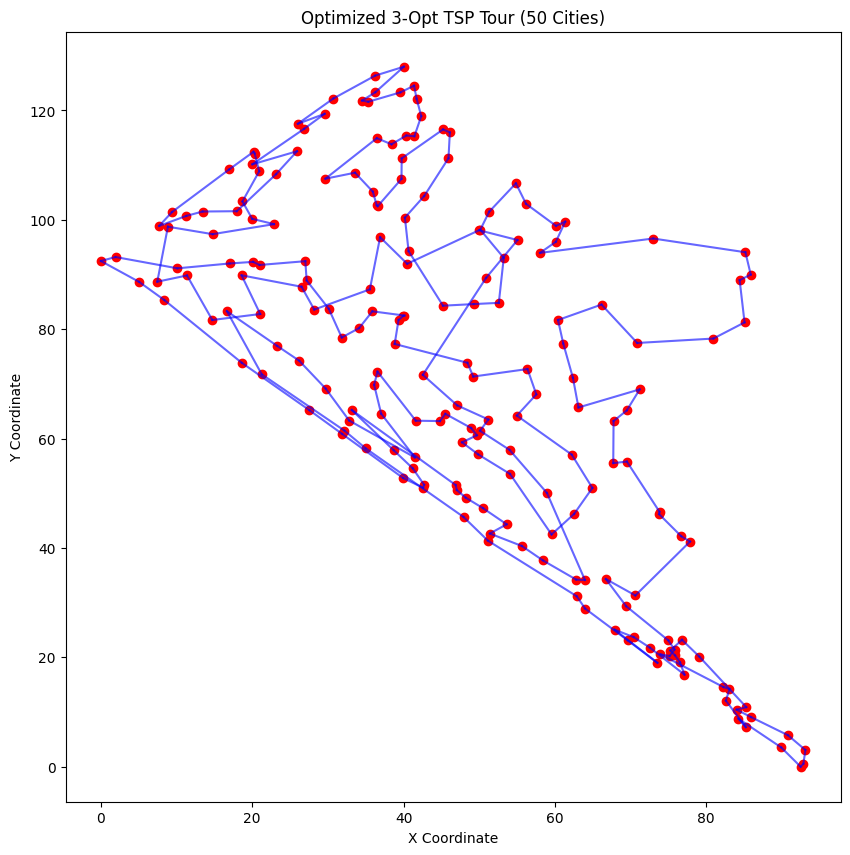

In [ ]:
plot_tour(optimized_tour, distance_matrix)

#**Lin-Kernighan heuristic**

In [ ]:
def lin_kernighan(distance_matrix, max_depth=5):
    """
    Lin-Kernighan heuristic for TSP.
    :param distance_matrix: Precomputed distance matrix.
    :param max_depth: Maximum number of edge exchanges (k-opt moves) to explore.
    :return: Optimized tour and its total distance.
    """
    # Initialize with a greedy tour
    best_tour = nearest_neighbor_tour(distance_matrix)
    best_distance = tour_length(best_tour, distance_matrix)
    n = len(best_tour) - 1  # Exclude duplicate 0 at the end

    improved = True
    while improved:
        improved = False
        for base in range(n):  # Try each city as a base node
            # Convert to list for easier manipulation (excluding final 0)
            tour = best_tour[:-1].copy()
            current_tour = tour.copy()
            current_distance = best_distance

            # Track the sequence of gains and moves
            gains = []
            removed_edges = []
            added_edges = []

            # Initialize with the base node (city 0)
            t1 = base
            for depth in range(max_depth):
                # Current edge to remove: (t1, t2)
                t2 = (t1 + 1) % n
                edge_remove = (tour[t1], tour[t2])
                removed_edges.append(edge_remove)
                gain_remove = distance_matrix[edge_remove[0]][edge_remove[1]]

                # Find the best possible edge addition (t2, t4)
                best_gain = -math.inf
                best_t4 = None
                for t4_candidate in range(n):
                    if t4_candidate == t1 or t4_candidate == t2:
                        continue
                    # Proposed edge to add: (t2, t4_candidate)
                    edge_add = (tour[t2], tour[t4_candidate])
                    gain_add = distance_matrix[edge_add[0]][edge_add[1]]
                    gain = gain_remove - gain_add
                    if gain > best_gain:
                        best_gain = gain
                        best_t4 = t4_candidate

                if best_gain <= 0:
                    break  # No improvement found at this depth

                # Update gains and edges
                gains.append(best_gain)
                added_edges.append((tour[t2], tour[best_t4]))

                # Check if cumulative gain is positive
                cumulative_gain = sum(gains)
                if cumulative_gain > 0:
                    # Perform the move and update the tour
                    new_tour = current_tour[:t1+1] + current_tour[t2:best_t4+1][::-1] + current_tour[best_t4+1:]
                    new_tour.append(0)  # Re-add the final 0
                    new_distance = current_distance - cumulative_gain

                    # Validate the new tour
                    if new_distance < best_distance:
                        best_tour = new_tour
                        best_distance = new_distance
                        improved = True
                        break  # Restart search after improvement

                # Prepare for next iteration
                t1 = best_t4

            if improved:
                break

    return best_tour, best_distance

# Run 3-opt and display results
initial_tour = nearest_neighbor_tour(distance_matrix)
print("Initial Tour:", initial_tour, "Distance:", tour_length(initial_tour, distance_matrix))


optimized_tour, optimized_distance = three_opt(distance_matrix)
print("Optimized Tour:", optimized_tour, "Distance:", optimized_distance)

Initial Tour: [0, 179, 43, 34, 140, 132, 157, 83, 73, 174, 122, 150, 67, 19, 85, 14, 7, 167, 193, 185, 171, 8, 2, 101, 60, 6, 177, 104, 81, 106, 117, 136, 180, 48, 126, 98, 124, 57, 194, 198, 74, 58, 100, 37, 113, 49, 36, 92, 47, 79, 166, 161, 84, 146, 41, 143, 29, 18, 72, 115, 5, 68, 56, 11, 38, 156, 25, 187, 160, 149, 175, 134, 147, 181, 31, 45, 135, 163, 33, 191, 23, 148, 176, 162, 70, 169, 63, 186, 54, 82, 103, 75, 27, 107, 12, 3, 62, 21, 69, 141, 129, 55, 87, 159, 94, 142, 182, 61, 133, 4, 139, 59, 109, 17, 196, 172, 16, 112, 123, 28, 128, 42, 155, 151, 96, 77, 189, 105, 76, 121, 93, 32, 120, 66, 80, 154, 88, 178, 91, 1, 188, 89, 90, 71, 197, 10, 65, 97, 39, 50, 40, 158, 127, 22, 114, 95, 184, 35, 119, 118, 26, 138, 170, 165, 15, 30, 152, 108, 24, 51, 44, 153, 111, 168, 78, 64, 144, 52, 183, 13, 53, 192, 9, 173, 199, 110, 102, 190, 137, 86, 195, 99, 46, 130, 125, 145, 20, 131, 164, 116, 0] Distance: 1402.0198203752232
Optimized Tour: [0, 179, 140, 132, 157, 83, 73, 174, 122, 67, 1

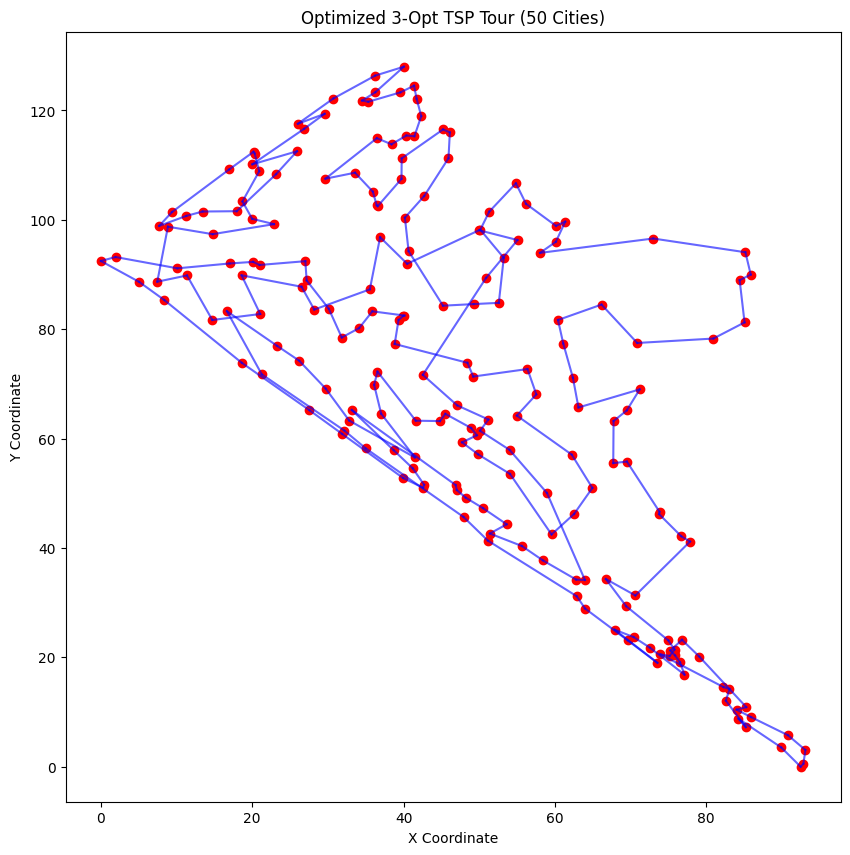

In [ ]:
plot_tour(optimized_tour, distance_matrix)